In [1]:
# Dependencies and configuration
import os

PAGES_DIR = 'data/pages'  # change this to where your JPGs are
PANELS_DIR = 'data/panels'
CROPS_DIR = 'data/crops'

os.makedirs(PANELS_DIR, exist_ok=True)
os.makedirs(CROPS_DIR, exist_ok=True)

In [ ]:
from src.panelExtraction import extract_panels, hybrid_extract_panels
import glob, os

page_paths = sorted(glob.glob(os.path.join(PAGES_DIR, '*.jpg')) + glob.glob(os.path.join(PAGES_DIR, '*.png')))

extract_panels(page_paths, PANELS_DIR, hybrid_extract_panels)

In [2]:
from src.headExtraction import anime_extraction
import glob, os

panel_paths = sorted(glob.glob(os.path.join(PANELS_DIR, '*.jpg')))

anime_extraction(panel_paths, CROPS_DIR)

Saved 85 anime face crops to data/crops


Found 85 crops
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step
Saved embeddings and paths
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


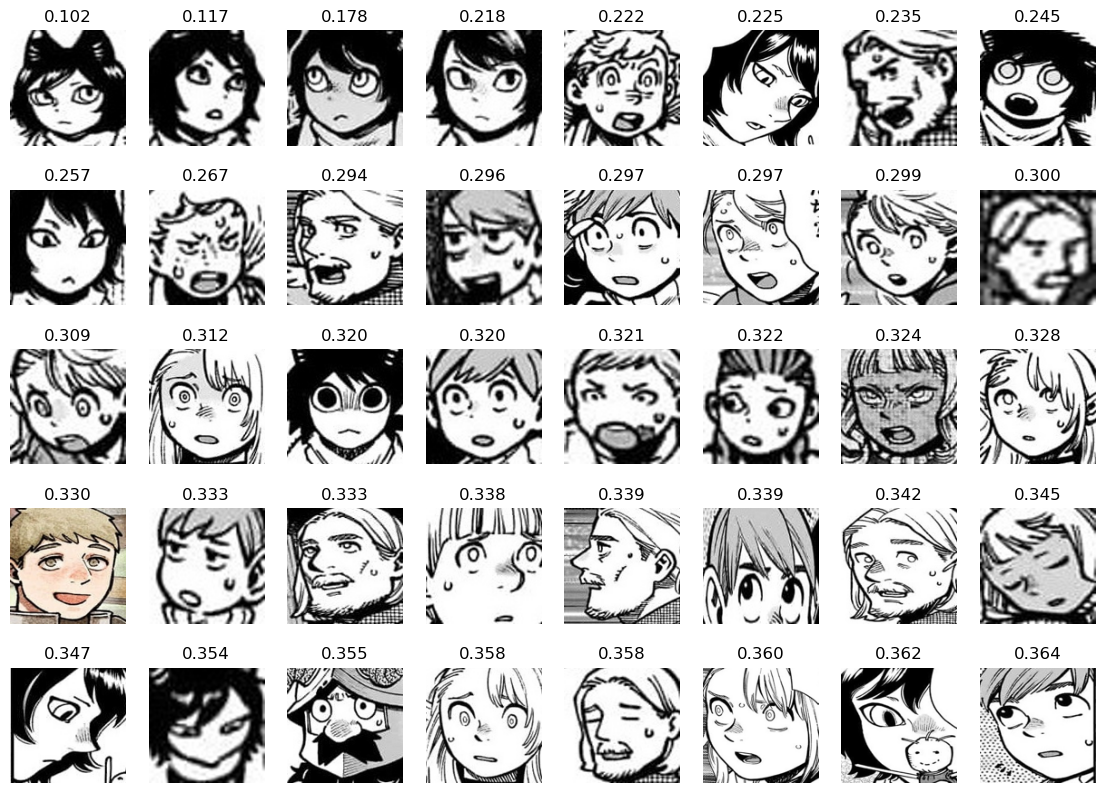

In [3]:
from src.recognitionModel import build_model, char_nearest_neighbor

IMG_SIZE = 128
EMBED_PATH = 'data/embeddings.npy'
CROP_PATH = 'data/crop_paths.json'

embed_model = build_model(IMG_SIZE, CROPS_DIR)
seed_paths = [
    'data/crops/008_panel_103_8_face_0.jpg',
    'data/crops/010_panel_59_1_face_2.jpg',
    'data/crops/011_panel_251_0_face_1.jpg',
    'data/crops/012_panel_56_0_face_0.jpg',
]

char_nearest_neighbor(EMBED_PATH, CROP_PATH, IMG_SIZE, embed_model, seed_paths)